# Din√°mica de entrelazamiento

En este notebook exploramos num√©ricamente la din√°mica de entrelazamiento entre dos sistemas de dimensi√≥n dos, replicando la cuenta anal√≠tica que hicimos en clase, modificaciones m√°s realistas de ella, y por √∫ltimo considerando los efectos que tiene interactuar con un entorno.

In [1]:
## Importamos librer√≠as a usar

# Numpy y Scipy son librer√≠as de c√°lculo num√©rico en Python
import numpy as np
import scipy as sp

# Qutip es una librer√≠a para mec√°nica cu√°ntica num√©rica en Python
# (esta primer parte es para que funcione en Google Colab)
import os
if "COLAB_GPU" in os.environ:
  !pip install -q qutip
# (ahora s√≠ importamos qutip de forma usual)
import qutip as qt
from qutip import basis, qeye, sigmax, sigmay, sigmaz, sigmap, sigmam, tensor, \
  mesolve, concurrence

# Matplotlib es para hacer lindos gr√°ficos
from matplotlib import rc
#rc('text', usetex=True)
#rc('font', size=12)
import matplotlib.pyplot as plt

Ejemplo de c√≥mo crear la base producto del espacio de los dos sistmeas de dimensi√≥n 2.

In [2]:
# Base producto de autoestados de Sz
ket00 = tensor(basis(2,0),basis(2,0))
ket01 = tensor(basis(2,0),basis(2,1))
ket10 = tensor(basis(2,1),basis(2,0))
ket11 = tensor(basis(2,1),basis(2,1))

## Replicando los resultados del Problema 18

En este problema ten√≠amos dos spin 1/2 que interactuaban entre s√≠ con un Hamiltoniano
$$H = J\sigma_z\otimes\sigma_z,$$
que nos es m√°s que una interacci√≥n efectiva de los dos momentos dipolares magn√©ticos de los spines. Nos interesaba estudiar la din√°mica del entrelazamiento generado por esta interacci√≥n si part√≠amos de un estado producto.

El estado inicial del problema es el estado $|+,x\rangle\otimes|+,x\rangle$.
Para ello, definimos el estado de un spin 1/2, $|+,x\rangle = \frac{1}{\sqrt{2}}(|+\rangle + |-\rangle)$, y despu√©s simplemente tomamos producto tensorial.

In [3]:
# Autoestado +1 de Sx
ketXplus = (basis(2,0) + basis(2,1))/np.sqrt(2)

# Estado inicial: |+x>‚äó|+x>
IniState = tensor(ketXplus,ketXplus)

Ahora definimos el Hamiltoniano, y la lista de tiempos para los cuales queremos tener el estado $|\Psi(t)\rangle_{AB}$.

In [4]:
# Hamiltoniano: J*Sz‚äóSz
J = 1.0
H = J*tensor(sigmaz(),sigmaz())

# Estado Inicial evolucionado
times = np.linspace(0, np.pi/J, 400)
res = mesolve(H, IniState, times)

Con la lista de estados $|\Psi(t)\rangle_{AB}$, calculamos las matrices densidad reducidas sobre la primer part√≠cula, su pureza, y con ella la medida de entrelazamiento (v√°lida para estados globalmente puros)
$$E(\Psi_{AB}(t)) = 1 - \rm{tr}[\rho_A^2(t)], \qquad \rho_A(t)=\rm{tr}_B[|\Psi_{AB}(t)\rangle\langle\Psi_{AB}(t)|]$$

In [5]:
# Estados reducidos primer subsistema, su pureza, y medida de entrelazamiento
reduced = [ state.ptrace(0) for state in res.states ]
purity = np.array([ (r**2).tr() for r in reduced ])
Eent = 1 - purity

Con todo esto (que calculamos anal√≠ticamente en clase) repliquemos el gr√°fico que obutivmos al final de la clase del entrelazamiento en funci√≥n del tiempo.

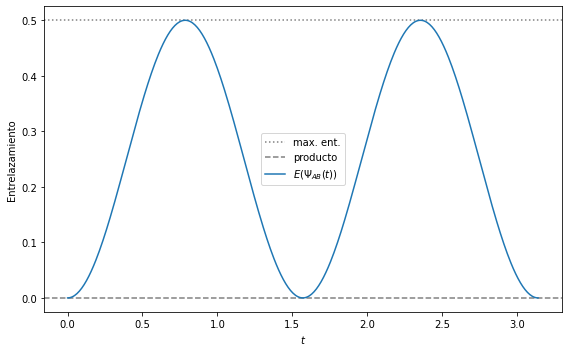

In [6]:
# Reproducimos gr√°fico que hicimos en clase
fig, ax = plt.subplots(1, 1, figsize=(8,5))

ax.axhline(1/2, linestyle=':', color='gray', label='max. ent.')
ax.axhline(0, linestyle='--', color='gray', label='producto')
ax.plot(times, Eent, '-', color='C0', label='$E(\Psi_{AB}(t))$')
ax.set_xlabel('$t$')
ax.set_ylabel('Entrelazamiento')
ax.legend()

fig.tight_layout()
#fig.savefig('out/etunit.png', dpi=300)
plt.show()

## Problema 18 con campo externo

En la clase les dije que una versi√≥n m√°s realista de esto tendr√≠a en cuenta el efecto de un campo mag√©tico sobre cada spin, de forma tal que uno podr√≠a por ejemplo escribir
$$H = -\boldsymbol{B}\cdot\boldsymbol{\sigma}\otimes\mathbb{1} - \mathbb{1}\otimes\boldsymbol{B}\cdot\boldsymbol{\sigma} + J\sigma_z\otimes\sigma_z$$
Les coment√© que nada cambia desde un punto de vista cualitativo. Dado que ahora hacer estos c√°lculos es gratis, veamos que efectivamente es as√≠.

### Campo paralelo
Veamos primero el caso en que el campo es paralelo a la interacci√≥n spin-spin.
Es decir,
$$H = -B\sigma_z\otimes\mathbb{1} - B\mathbb{1}\otimes\sigma_z + J\sigma_z\otimes\sigma_z$$
En tal caso, repitiendo todo lo de arriba, el entrelazamiento en funci√≥n del tiempo es

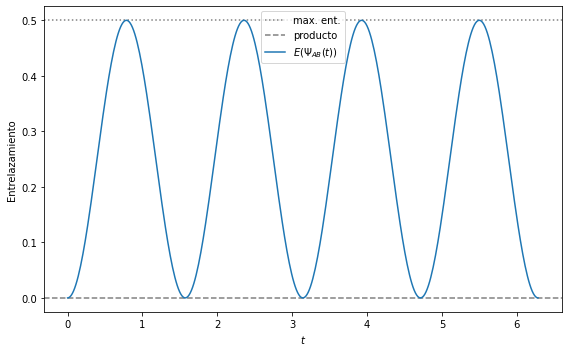

In [7]:
# Hamiltoniano: - B*Sz‚äó1 - B*1‚äóSz + J*Sz‚äóSz
B, J = 2.0, 1.0
H = -B*tensor(sigmaz(),qeye(2)) - B*tensor(qeye(2),sigmaz()) +\
  J*tensor(sigmaz(),sigmaz())

# Estado Inicial evolucionado
times = np.linspace(0, 2*np.pi/J, 400)
res = mesolve(H, IniState, times)

# Estados reducidos primer subsitema, su pureza, y medida de entrelazamiento
reduced = [ state.ptrace(0) for state in res.states ]
purity = np.array([ (r**2).tr() for r in reduced ])
Eent = 1 - purity

# Gr√°fico equivalente al que hicimos en clase
fig, ax = plt.subplots(1, 1, figsize=(8,5))

ax.axhline(1/2, linestyle=':', color='gray', label='max. ent.')
ax.axhline(0, linestyle='--', color='gray', label='producto')
ax.plot(times, Eent, '-', color='C0', label='$E(\Psi_{AB}(t))$')
ax.set_xlabel('$t$')
ax.set_ylabel('Entrelazamiento')
ax.legend()

fig.tight_layout()
#fig.savefig('out/etunitbpar.png', dpi=300)
plt.show()

M√°s all√° de un cambio en la frecuencia, efectivamente nada cambi√≥ respecto a la evoluci√≥n del entrelazamiento.

### Campo trasverso
Mucho m√°s interesante es la situaci√≥n de un campo trasverso, es decir que su direcci√≥n es perpendicular a la de la intreacci√≥n spin-spin. Tomamos entonces el Hamiltoniano
$$H = -B\sigma_z\otimes\mathbb{1} - B\mathbb{1}\otimes\sigma_z + J\sigma_x\otimes\sigma_x$$
Ahora, repitiendo todo lo de arriba, el entrelazamiento en funci√≥n del tiempo es

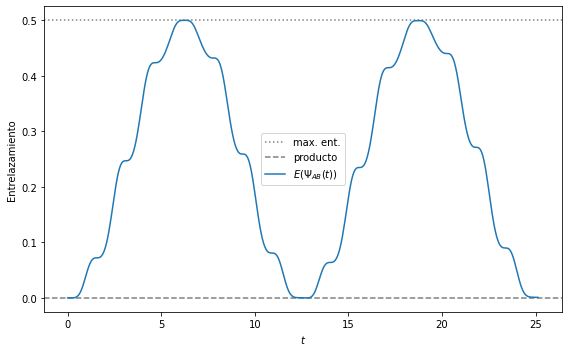

In [8]:
# Hamiltoniano: - B*Sz‚äó1 - B*1‚äóSz + J*Sz‚äóSz
B, J = 1.0, 0.25
H = -B*tensor(sigmaz(),qeye(2)) - B*tensor(qeye(2),sigmaz()) +\
  J*tensor(sigmax(),sigmax())

# Estado Inicial evolucionado
times = np.linspace(0, 2*np.pi/J, 400)
res = mesolve(H, IniState, times)

# Estados reducidos primer subsitema, su pureza, y medida de entrelazamiento
reduced = [ state.ptrace(0) for state in res.states ]
purity = np.array([ (r**2).tr() for r in reduced ])
Eent = 1 - purity

# Gr√°fico equivalente al que hicimos en clase
fig, ax = plt.subplots(1, 1, figsize=(8,5))

ax.axhline(1/2, linestyle=':', color='gray', label='max. ent.')
ax.axhline(0, linestyle='--', color='gray', label='producto')
ax.plot(times, Eent, '-', color='C0', label='$E(\Psi_{AB}(t))$')
ax.set_xlabel('$t$')
ax.set_ylabel('Entrelazamiento')
ax.legend()

fig.tight_layout()
#fig.savefig('out/etunitbtrans.png', dpi=300)
plt.show()

Como dije, *cualitativamente* no cambia nada.

(Si se ponen a jugar con los valores de $B$ y $J$ en este caso ver√°n que al forma es bastante sensible, pero siempre se tiene alg√∫n tipo de oscilaci√≥n en el entrelazamiento.)

## Efectos del entorno
La idea ahora es mostrarles los resultados de considerar la interacci√≥n con un entorno. Antes de pasar a ello cabe notar que, como ahora nuestros dos spins son una parte de algo m√°s grande (el universo ser√° spins + entorno), entonces el estado de los dos spins ya no ser√° un estado puro, a√∫n si comienza en un estado puro (efectivamente esto lo vimos justamente mirando el estado reducido de uno solo de los dos spins en el problema anterior). Por lo tanto, si queremos medir entrelazamiento, ya no podremos recurrir a la pureza del estado local.

Si leyeron el material que puse ayer sobre entrelazamiento en sistemas mixtos, medir el entrelazamiento es en general muy d√≠ficil en estos casos.
En una nota m√°s alegre, aqu√≠ no estamos mirando cualquier sistema mixto, sino que un sistema compuesto por dos subsistemas de dimensi√≥n 2. Afortunadamente, para el caso de dos sistemas de dimensi√≥n 2 (y pr√°cticamente solo para este caso) **s√≠** se conocen condiciones necesarias y suficientes para ser entrelazado a√∫n en el caso mixto, y se conocen medidas de entrelazamiento que miden cu√°n entrelazado es el estado (ya sea mixto o puro). Hay m√°s de una funci√≥n de este tipo, una de las m√°s conocidas y usadas es la *concurrencia*.

### Concurrencia (medida de entrelazamiento para dos qubits)
Como les dec√≠a, la concurrencia es una medida de entrelazamiento para sistemas compuestos de dos subsistemas de dimensi√≥n 2 y que funciona igual de bien para estados puros o mixtos. Ac√° no me voy a preocupar ni de dar su definici√≥n, porque aunque no es complicada, a simple vista no es para *nada* claro porqu√© mide el entrelazamiento. El que quiera puede mirar el [art√≠culo (muy escueto) de Wikipedia](https://en.wikipedia.org/wiki/Concurrence_(quantum_computing)).
M√°s all√° de su definici√≥n, la concurrencia $C(\rho_{AB})$ es tal que


*   $C(\rho_{AB}) = 0$ si y s√≥lo si el estado es separable
*   $C(\rho_{AB}) > 0$ si y s√≥lo si el estado es entrelazado
*   $C(\rho_{AB}) = 1$ si y s√≥lo si el estado es m√°ximamente entrelazado

M√°s a√∫n, cuanto mayor la concurrencia, mayor el entrelazamiento (se dice que la concurrencia es una mon√≥tona del entrelazamiento).


Para ganar intuici√≥n de que efectivamente hace lo que les prometo, calculemos la concurrencia para el Problema 18 y comparemos con el gr√°fico de la medida que obtuvimos a partir de la pureza de la matriz densidad reducida.

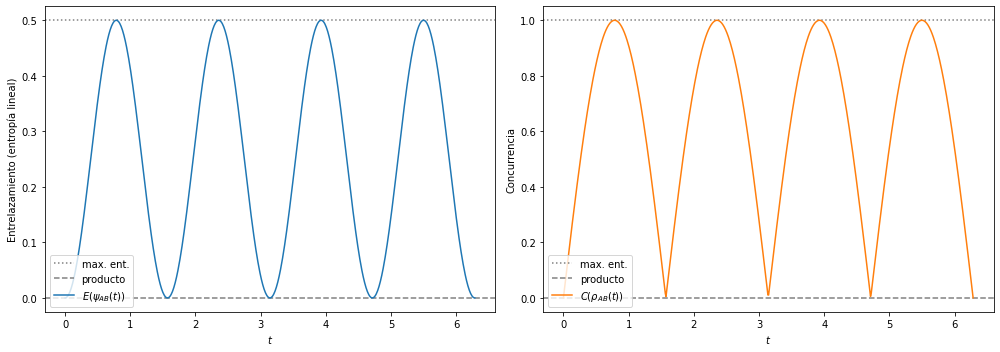

In [9]:
# Hamiltoniano: - B*Sz‚äó1 - B*1‚äóSz + J*Sz‚äóSz
B, J = 2.0, 1.0
H = -B*tensor(sigmaz(),qeye(2)) - B*tensor(qeye(2),sigmaz()) +\
  J*tensor(sigmaz(),sigmaz())

# Estado Inicial evolucionado
times = np.linspace(0, 2*np.pi/J, 600)
res = mesolve(H, IniState, times)

# Estados reducidos primer subsitema, su pureza, y medida de entrelazamiento
reduced = [ state.ptrace(0) for state in res.states ]
purity = np.array([ (r**2).tr() for r in reduced ])
Eent = 1 - purity

# Concurrencia
C = np.array([ concurrence(state) for state in res.states ])

# Gr√°fico de comparaci√≥n E vs C
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(14,5))

ax1.axhline(1/2, linestyle=':', color='gray', label='max. ent.')
ax1.axhline(0, linestyle='--', color='gray', label='producto')
ax1.plot(times, Eent, '-', color='C0', label='$E(\psi_{AB}(t))$')
ax1.set_xlabel('$t$')
ax1.set_ylabel('Entrelazamiento (entrop√≠a lineal)')
ax1.legend(loc=3)

ax2.axhline(1, linestyle=':', color='gray', label='max. ent.')
ax2.axhline(0, linestyle='--', color='gray', label='producto')
ax2.plot(times, C, '-', color='C1', label='$C(\\rho_{AB}(t))$')
ax2.set_xlabel('$t$')
ax2.set_ylabel('Concurrencia')
ax2.legend(loc=3)

fig.tight_layout()
#fig.savefig('out/evsc.png', dpi=300)
plt.show()

Se ve que ambas funciones est√°n en el fondo midiendo la misma cosa (aunque de forma distinta). Efectivamente, ambas funciones van creciendo (y decreciendo) m√≥notonamente, y los puntos de m√°ximo entrelazamiento y entrelazamiento nulo coinciden.

### Interacci√≥n con un entorno: amplitude damping (decaimiento al fundamental)
Ahora s√≠ consideraremos los efectos del entorno. Como les dije en clase, el modelado de un entorno es el punto de partida de la Mec√°nica Cu√°ntica de Sistemas Abiertos, que es un tema gigantesco y no se puede presentar en dos minutos. As√≠ que simplemente les voy a comentar qu√© estoy modelando en palabras, y les queda el c√≥digo que lo hace, pero en ning√∫n momento voy a escribir una ecuaci√≥n para la evoluci√≥n temporal.

En primer lugar consideraremos una de las formas m√°s sencillas de interacci√≥n con un entorno: el "amplitude damping", que b√°sicamente es un decaimiento al estado fundamental. Efectivamente, para fijar ideas, sup√≥nganse que en cambio de spin 1/2 en sentido abstracto, nuestros dos sistemas de dimensi√≥n 2 son cada uno dos niveles de un √°tomo que pueden estar ocupados (el fundamental y el primer excitado). Como no les deber√≠a sorpender, si yo excito el electr√≥n de un √°tomo, aunque pase exactamente a un autoestado de mayor energ√≠a, √©ste eventualmente va a decaer a su estado fundamental. √âsto deber√≠a parecerles razonable, pero desde un punto de vista de la teor√≠a cu√°ntica necesariamente nos est√° mostrando que el sistema est√° interactuando con algo externo, porque el primer excitado sino deber√≠a ser un estado estacionario y el electr√≥n deber√≠a quedarse ah√≠ para siempre. El hecho que un √°tomo decae a su estado fundamental es consecuencia directa de estar interactuando con un entorno con una infinidad de grados de libertad que se acoplan (aunque sea poco) con el √°tomo.

Aqu√≠ consideraremos este efecto del entorno sobre nuestro sistema, que modelamos de forma sencilla como una probabilidad $\gamma$ por unidad de tiempo de que cada spin decaiga del estado excitado al estado fundamental.
Veamos en tal caso qu√© sucede con el entrelazamiento (medido como concurrencia) en funci√≥n del tiempo.

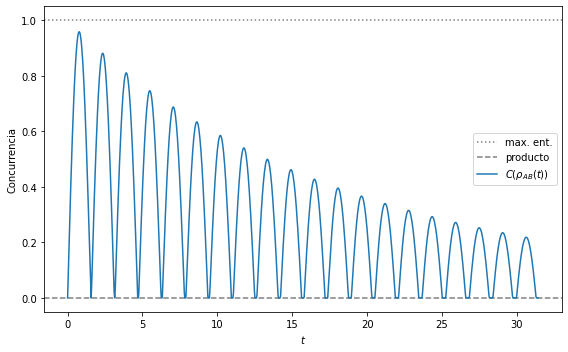

In [10]:
# Hamiltoniano: - B*Sz‚äó1 - B*1‚äóSz + J*Sz‚äóSz
B, J = 2.0, 1.0
H = -B*tensor(sigmaz(),qeye(2)) - B*tensor(qeye(2),sigmaz()) +\
  J*tensor(sigmaz(),sigmaz())

# Disipaci√≥n: ùõæ probabilidad de decaer el estado fundamental
gamma = 0.2
L = [gamma*tensor(sigmap(),qeye(2)), gamma*tensor(qeye(2),sigmap())]

# Estado Inicial evolucionado
times = np.linspace(0, 10*np.pi/J, 900)
res = mesolve(H, IniState, times, L)

# Concurrencia
C = np.array([ concurrence(state) for state in res.states ])

# Gr√°fico de entrelazamiento (concurrencia)
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8,5))

ax.axhline(1, linestyle=':', color='gray', label='max. ent.')
ax.axhline(0, linestyle='--', color='gray', label='producto')
ax.plot(times, C, '-', color='C0', label='$C(\\rho_{AB}(t))$')
ax.set_xlabel('$t$')
ax.set_ylabel('Concurrencia')
ax.legend()

fig.tight_layout()
#fig.savefig('out/cdecaydamp.png', dpi=300)
plt.show()

Notemos que tenemos oscilaciones en la cantidad de entrelazamiento, pero a diferencia de antes, ahora la amplitud decae (de hecho se puede mostrar decae exponencialmente con tasa fijada por $\gamma$).

Veamos un gr√°fico con varios $\gamma$ para comparar.

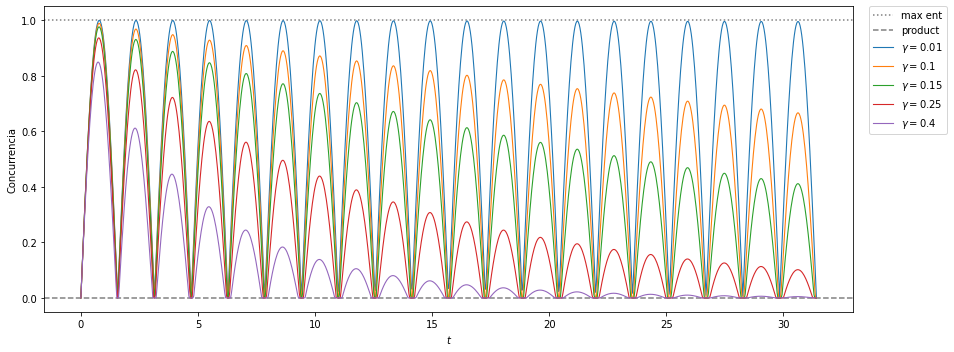

In [11]:
gammas = [ 0.01, 0.1, 0.15, 0.25, 0.4 ]
Cs = []
B, J = 2.0, 1.0
times = np.linspace(0, 10*np.pi/J, 900)
H = -B*tensor(sigmaz(),qeye(2)) - B*tensor(qeye(2),sigmaz()) +\
  J*tensor(sigmaz(),sigmaz())

for gamma in gammas:
    L = [gamma*tensor(sigmap(),qeye(2)), gamma*tensor(qeye(2),sigmap())]
    res = mesolve(H, IniState, times, L)
    C = np.array([ concurrence(state) for state in res.states ])
    Cs.append(C)

fig, ax = plt.subplots(1, 1, figsize=(14,5))

ax.axhline(1, linestyle=':', color='gray', label='max ent')
ax.axhline(0, linestyle='--', color='gray', label='product')
for idx,gamma in enumerate(gammas):
    ax.plot(times, Cs[idx], '-', linewidth=1.1,
             label='$\gamma = {}$'.format(gamma))
ax.set_xlabel('$t$')
ax.set_ylabel('Concurrencia')
ax.legend(bbox_to_anchor=(1.02,1), borderaxespad=0)

fig.tight_layout()
fig.subplots_adjust(right=0.85)
#fig.savefig('out/cdecaydampgammacomp.png', dpi=300)
plt.show()

Cuanto mayor $\gamma$, mayor la interacci√≥n con en el entorno y la disipaci√≥n, lo cual a su vez nos causa una m√°s r√°pida p√©rdida del entrelazamiento.

### Interacci√≥n con un entorno: termalizaci√≥n
La interacci√≥n anterior con el entorno es de lo m√°s sencillo, simplemente tenemos una probabilidad $\gamma$ de decaer al fundamental. En un escenario a√∫n m√°s real, uno tiene probabilidad de decaer, pero tambi√©n cada tanto probabilidad de excitarse debido a energ√≠a que le llega del entorno. Esto tambi√©n lo podemos modelar, considerando ahora una probabilidad por unidad de tiempo $(1-g)\gamma$ de decaer al fundamental, y un probabilidad $g\gamma$ de excitarse. El caso anterior se corresponde a $g=0$. Rehaciendo lo mismo se tiene.

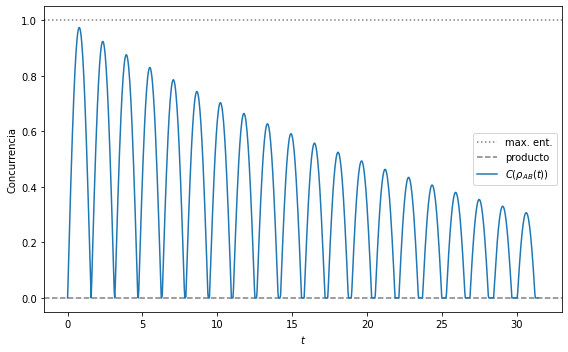

In [12]:
# Hamiltoniano: - B*Sz‚äó1 - B*1‚äóSz + J*Sz‚äóSz
B, J = 2.0, 1.0
H = -B*tensor(sigmaz(),qeye(2)) - B*tensor(qeye(2),sigmaz()) +\
  J*tensor(sigmaz(),sigmaz())

# Disipaci√≥n: ùõæ probabilidad de decaer el estado fundamental
gamma, g = 0.2, 0.3
L = [(1-g)*gamma*tensor(sigmap(),qeye(2)), (1-g)*gamma*tensor(qeye(2),sigmap()),
     g*gamma*tensor(sigmam(),qeye(2)), g*gamma*tensor(qeye(2),sigmam())]

# Estado Inicial evolucionado
times = np.linspace(0, 10*np.pi/J, 900)
res = mesolve(H, IniState, times, L)

# Concurrencia
C = np.array([ concurrence(state) for state in res.states ])

# Gr√°fico de entrelazamiento (concurrencia)
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8,5))

ax.axhline(1, linestyle=':', color='gray', label='max. ent.')
ax.axhline(0, linestyle='--', color='gray', label='producto')
ax.plot(times, C, '-', color='C0', label='$C(\\rho_{AB}(t))$')
ax.set_xlabel('$t$')
ax.set_ylabel('Concurrencia')
ax.legend()

fig.tight_layout()
#fig.savefig('out/cdecaytherm.png', dpi=300)
plt.show()

Notemos que en t√©rminos de la evoluci√≥n del entrelazamiento se tiene b√°sicamente lo mismo. En qu√© difieren entonces estas dos situaciones? Para ver eso, hay que ver cu√°les son las evoluciones temporales de las matrices densidad reducidas de cada spin. En cambio de escribir matrices con n√∫meros (que poco ayudan a visualizar lo que est√° pasando), haremos un gr√°fico de las matrices densidad, donde los colores indican el valor de cada coeficiente. Adem√°s, dada la simetr√≠a del problema, miraremos la matriz densidad reducida de uno solo de los spins.

Comencemos mirando al evoluci√≥n temporal de la matriz densidad reducida para el caso de evoluci√≥n unitaria sin ba√±os ($\gamma = 0$).

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x117d8b910>)

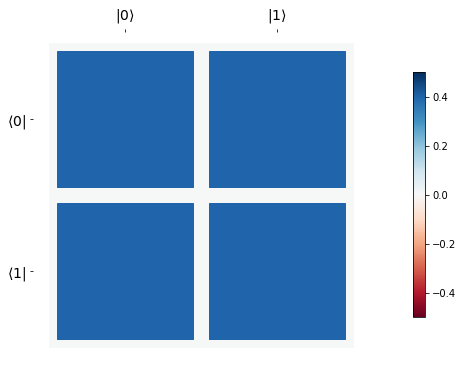

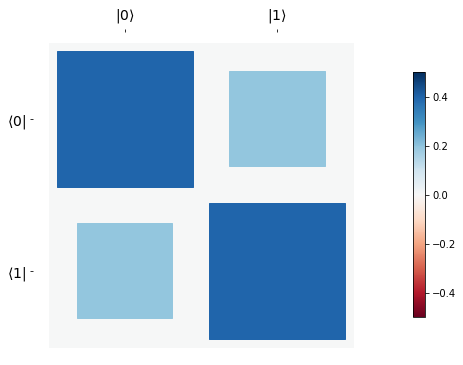

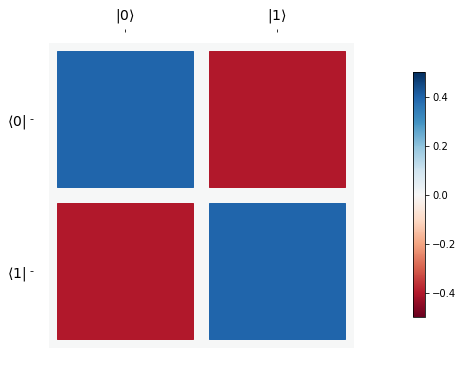

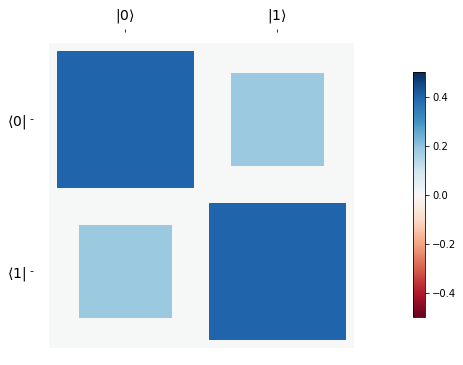

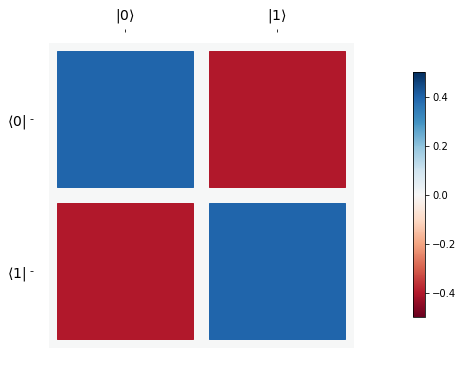

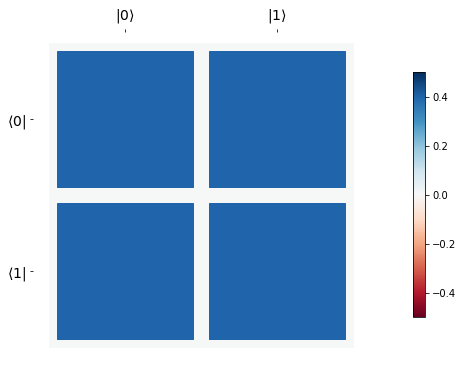

In [13]:
# Hamiltoniano: - B*Sz‚äó1 - B*1‚äóSz + J*Sz‚äóSz
B, J = 2.0, 1.0
H = -B*tensor(sigmaz(),qeye(2)) - B*tensor(qeye(2),sigmaz()) +\
  J*tensor(sigmaz(),sigmaz())

# Disipaci√≥n: ùõæ probabilidad de decaer el estado fundamental
gamma, g = 0.0, 0.0
L = [(1-g)*gamma*tensor(sigmap(),qeye(2)), (1-g)*gamma*tensor(qeye(2),sigmap()),
     g*gamma*tensor(sigmam(),qeye(2)), g*gamma*tensor(qeye(2),sigmam())]

# Estado Inicial evolucionado
times = np.linspace(0, 10*np.pi/J, 900)
res = mesolve(H, IniState, times, L)

# Matriz densidad reducida primer spin
rhoA = []
for idx in range(len(times)):
    rhoA.append(res.states[idx].ptrace(0))

# Gr√°fico de la matriz densidad reducida a distintos tiempos
qt.hinton(rhoA[0])
qt.hinton(rhoA[len(times)//6])
qt.hinton(rhoA[len(times)//4])
qt.hinton(rhoA[len(times)*2//3])
qt.hinton(rhoA[len(times)*3//4])
qt.hinton(rhoA[-1])

Vemos que los t√©rminos diagonales no cambian, y los extra diagonales oscilan peri√≥dicamente.

Ahora, con $\gamma > 0$, pero $g = 0$.

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x117ef1210>)

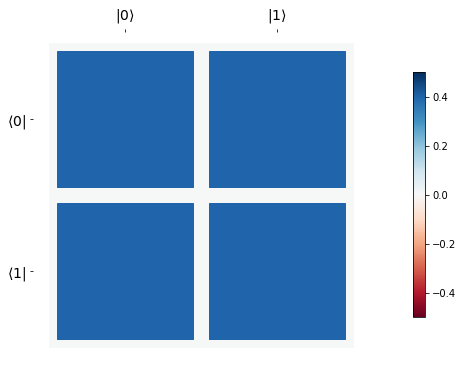

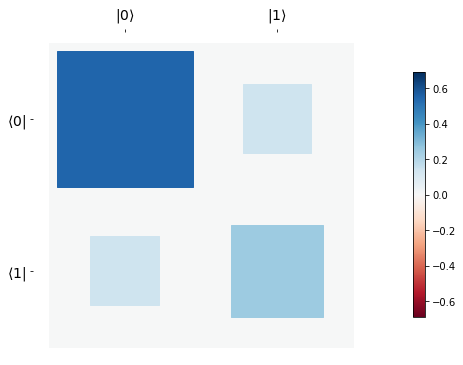

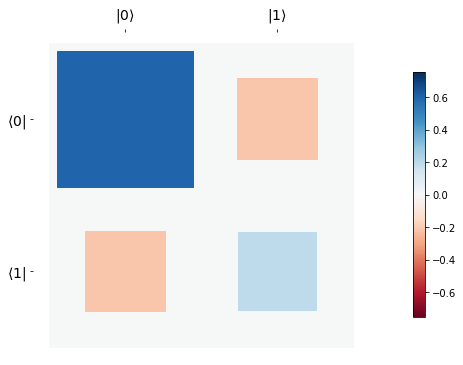

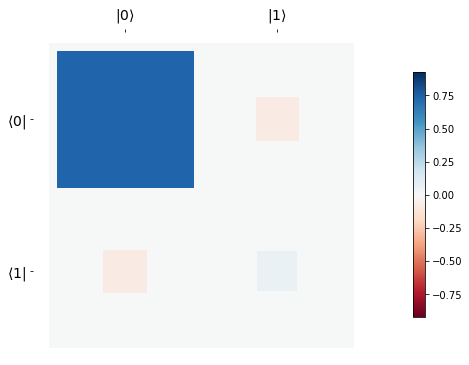

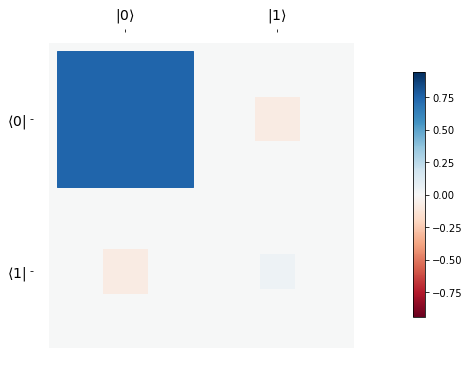

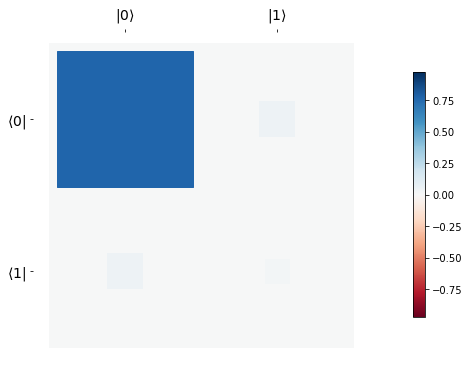

In [14]:
# Hamiltoniano: - B*Sz‚äó1 - B*1‚äóSz + J*Sz‚äóSz
B, J = 2.0, 1.0
H = -B*tensor(sigmaz(),qeye(2)) - B*tensor(qeye(2),sigmaz()) +\
  J*tensor(sigmaz(),sigmaz())

# Disipaci√≥n: ùõæ probabilidad de decaer el estado fundamental
gamma, g = 0.3, 0.0
L = [(1-g)*gamma*tensor(sigmap(),qeye(2)), (1-g)*gamma*tensor(qeye(2),sigmap()),
     g*gamma*tensor(sigmam(),qeye(2)), g*gamma*tensor(qeye(2),sigmam())]

# Estado Inicial evolucionado
times = np.linspace(0, 10*np.pi/J, 900)
res = mesolve(H, IniState, times, L)

# Matriz densidad reducida primer spin
rhoA = []
for idx in range(len(times)):
    rhoA.append(res.states[idx].ptrace(0))

# Gr√°fico de la matriz densidad reducida a distintos tiempos
qt.hinton(rhoA[0])
qt.hinton(rhoA[len(times)//6])
qt.hinton(rhoA[len(times)//4])
qt.hinton(rhoA[len(times)*2//3])
qt.hinton(rhoA[len(times)*3//4])
qt.hinton(rhoA[-1])

Ahora los t√©rminos diagonales (que son las probabilidades de estar en los respectivos estados) no se presevan, y se puede observar el decaimiento al fundamental. M√°s a√∫n, para los t√©rminos no diagonales (las coherencias, que en alg√∫n momento les coment√© son indicios de "efectos cu√°nticos") hay oscilaciones pero la amplitud se va amortiguando al pasar el tiempo.

Finalmente, $\gamma > 0$, $g > 0$.

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1185b71d0>)

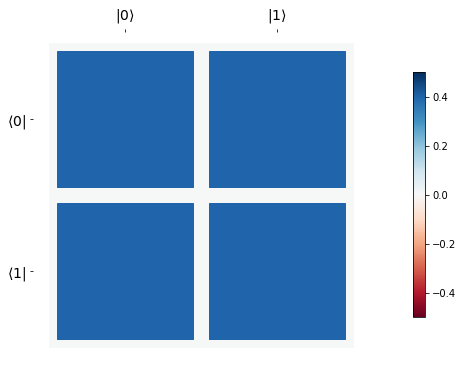

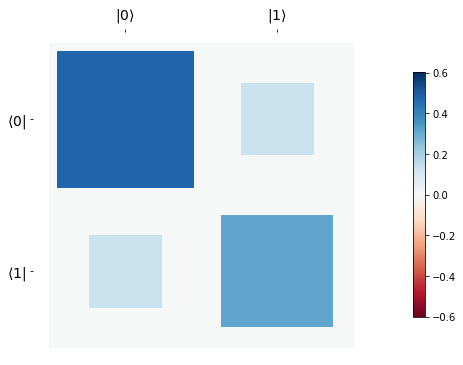

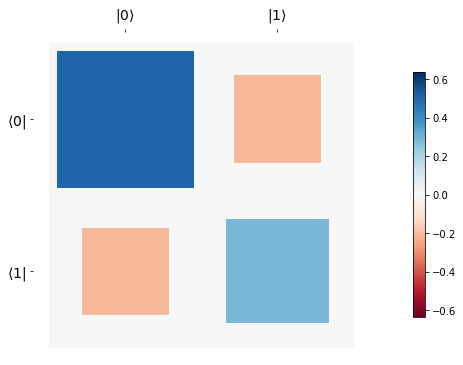

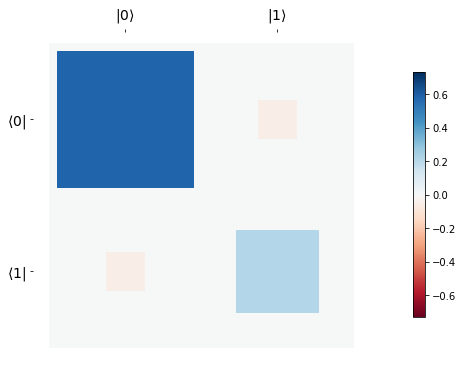

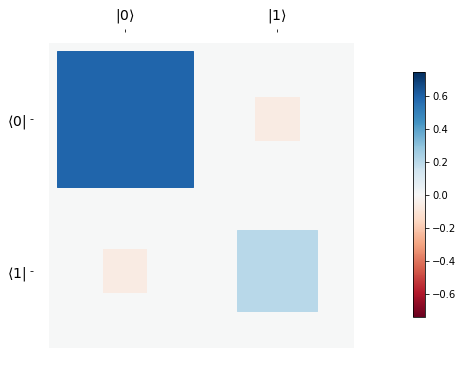

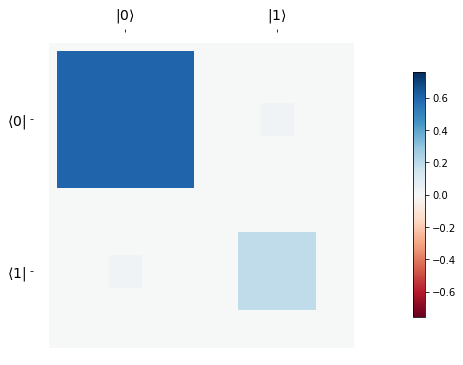

In [15]:
# Hamiltoniano: - B*Sz‚äó1 - B*1‚äóSz + J*Sz‚äóSz
B, J = 2.0, 1.0
H = -B*tensor(sigmaz(),qeye(2)) - B*tensor(qeye(2),sigmaz()) +\
  J*tensor(sigmaz(),sigmaz())

# Disipaci√≥n: ùõæ probabilidad de decaer el estado fundamental
gamma, g = 0.4, 0.35
L = [(1-g)*gamma*tensor(sigmap(),qeye(2)), (1-g)*gamma*tensor(qeye(2),sigmap()),
     g*gamma*tensor(sigmam(),qeye(2)), g*gamma*tensor(qeye(2),sigmam())]

# Estado Inicial evolucionado
times = np.linspace(0, 10*np.pi/J, 900)
res = mesolve(H, IniState, times, L)

# Matriz densidad reducida primer spin
rhoA = []
for idx in range(len(times)):
    rhoA.append(res.states[idx].ptrace(0))

# Gr√°fico de la matriz densidad reducida a distintos tiempos
qt.hinton(rhoA[0])
qt.hinton(rhoA[len(times)//6])
qt.hinton(rhoA[len(times)//4])
qt.hinton(rhoA[len(times)*2//3])
qt.hinton(rhoA[len(times)*3//4])
qt.hinton(rhoA[-1])

Nuevamente, los t√©rminos no diagonales se anulan en el l√≠mite. Los t√©rminos diagonales tampoco se preservan, pero ahora convergen a una distribuci√≥n con ambos estados, el fundamental y el excitado, poblados. Efectivamente, lo que se est√° describiendo con $\gamma > 0$ y $g > 0$ es un proceso de termalizaci√≥n del sistema donde la temperatura es $T = \frac{2B}{k_B\log[(1-g)/g]}$.

In [16]:
#for idx in range(len(times)):
#    qt.hinton(res.states[idx].ptrace(0))
#    plt.text(-2.0, 0.65, '$t = {:05d}$'.format(idx), bbox=dict(edgecolor='black', facecolor='white'))
#    plt.savefig('out/comp1/{:05d}.png'.format(idx))
#    plt.close()